Linear regression

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [88]:
data = pd.read_csv('1.csv')

In [89]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


convert to centimeters and kilograms

In [90]:
data['Height'] *= 2.54
data['Weight'] /= 2.205

metod plot Pandas DataFrame

<AxesSubplot:title={'center':'Height'}, ylabel='Frequency'>

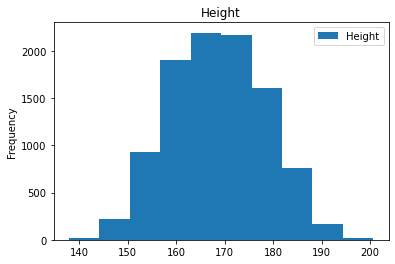

In [91]:
data.plot(y='Height', kind='hist', title='Height')

<AxesSubplot:title={'center':'Weight'}, ylabel='Frequency'>

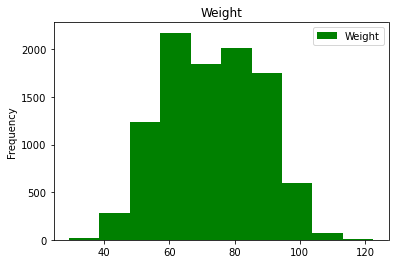

In [92]:
data.plot.hist(y='Weight', color='green',  title='Weight')

metod scatter matrix Pandas DataFrame or metod pairplot Seaborn.
Add a new feature BMI (Body Mass Index)
BMI = 10000*Weight / Height*Height

In [93]:
def make_bmi(height, weight):
    return (10000 * weight/ height ** 2)

In [94]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [95]:
data.head()

,Gender,Height,Weight,BMI
0,Male,187.571423,109.702296,31.180449
1,Male,174.706036,73.610192,24.116936
2,Male,188.239668,96.481114,27.228268
3,Male,182.196685,99.792504,30.061938
4,Male,177.499761,93.582676,29.702972


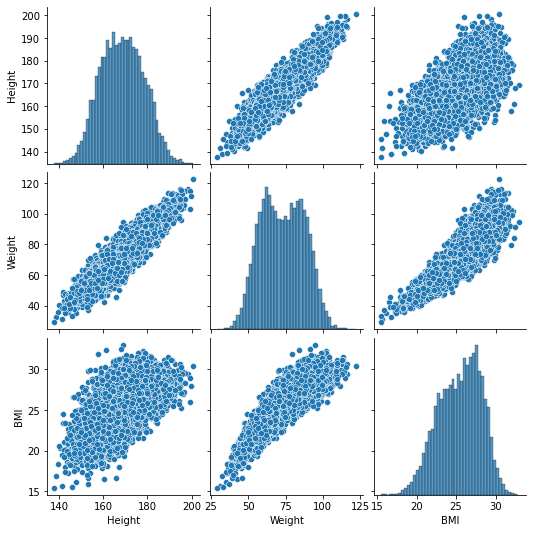

In [96]:
sns.pairplot(data)

Create new feature weight_category

In [97]:
def weight_category(weight):
    if weight < 54:
        return 1
    elif weight >= 68:
        return 3
    else:
        return 2

In [98]:
data['weight_category'] = data['Weight'].apply(weight_category)

Text(0, 0.5, 'Рост')

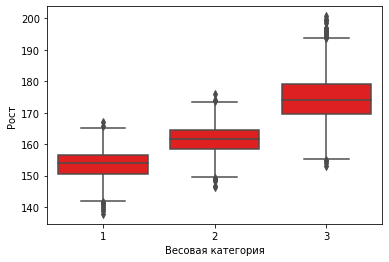

In [99]:
sns.boxplot(data=data,color = 'red', y= 'Height', x = 'weight_category')
plt.xlabel("Весовая категория")
plt.ylabel("Рост")

In [100]:
def plot_data():
    data.plot(x='Weight', y = 'Height', kind='scatter')
    plt.xlabel("Вес")
    plt.ylabel("Рост")
    plt.title("Зависимость роста от веса")

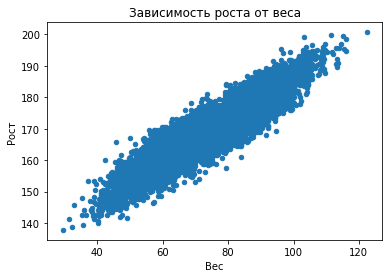

In [101]:
plot_data()

In [102]:
def get_error(w):
    return ((data['Height'] - (w[0] + w[1] * data['Weight']))**2).sum(axis=0)

In [103]:
def plot_line(x, w0, w1, color):
    y= w0 + w1 * x
    plt.plot(x, y, color=color)

Text(0, 0.5, 'error')

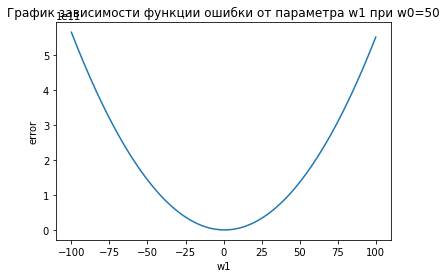

In [104]:
w0 = 123
w1 = np.linspace(-100, 100, 500)
y = [get_error([w0, w1_one]) for w1_one in w1]
plt.plot(w1, y)
plt.title('График зависимости функции ошибки от параметра w1 при w0=50')
plt.xlabel('w1')
plt.ylabel('error')

In [105]:
w0_const = 123
w1_opt = opt.minimize_scalar(lambda w1: get_error([w0_const,w1]),bounds=(-5,5)).x
print ("w0 и w1:", w0_const, w1_opt)
print('error', get_error([w0_const,w1_opt]))

w0 и w1: 123 0.6223881235392096
error 138310.42586419443


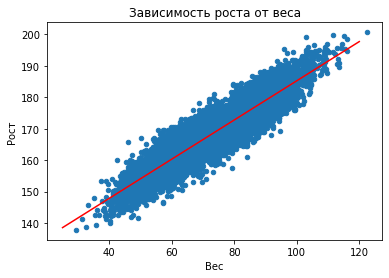

In [106]:
x = np.linspace(25, 120)
plot_data()
plot_line(x, w0_const, w1_opt, color='red')